# requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras as ks
import kerastuner as kt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from functools import reduce
from copy import deepcopy
from tqdm import tqdm
from tqdm.notebook import tqdm as tn

In [2]:
import imp

In [450]:
import AutoEncoderFactory

In [3]:
# custom modules and utils
from AutoEncoderBlocks import EncoderBlock,DecoderBlock
from AutoEncoderFactory import IncrementalAutoencoderFactory
import utils

In [4]:
plt.rcParams["figure.figsize"] = [20, 10] 
plt.rcParams["axes.grid"]=False
plt.rcParams["font.size"]=16

In [5]:
if tf.test.gpu_device_name(): 
    print(f"""Default GPU Device:
    {tf.test.gpu_device_name()}""")

Default GPU Device:
    /device:GPU:0


In [6]:
import gc

In [7]:
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering,linkage_tree
from scipy.cluster.hierarchy import dendrogram

# data

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory('data/Train/',
                                        batch_size=16,
                                        class_mode="input")
validation_generator = validation_datagen.flow_from_directory('data/Validation/',
                                        batch_size=16,
                                        class_mode="input")
test_generator = test_datagen.flow_from_directory('data/Test/',
                                        batch_size=16,
                                        class_mode="input")

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


# Model

## relu noisy

In [14]:
autoencoder_factory = IncrementalAutoencoderFactory([8,8,4,4,4],(256,256,3))

In [15]:
autoencoder_factory.build()

In [16]:
my_callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./models/noisy/incremental/best_model.h5',
        monitor='val_loss',
        mode="min"),
    tf.keras.callbacks.TerminateOnNaN(),
    tf.keras.callbacks.TensorBoard(log_dir='./logs/noisy/incremental/tboard')
]

In [17]:
autoencoder_factory.fit_factory(train_generator,validation_generator,1,my_callbacks)

625/625 [==============================] - 75s 119ms/step - loss: 0.9195 - mse: 0.0470 - kl_divergence: 1.1752 - val_loss: 0.5484 - val_mse: 0.0103 - val_kl_divergence: 0.2460


  0%|          | 0/4 [00:00<?, ?it/s]

625/625 [==============================] - 76s 117ms/step - loss: 0.8120 - mse: 0.0354 - kl_divergence: 0.8795 - val_loss: 0.5649 - val_mse: 0.0137 - val_kl_divergence: 0.3136


 25%|██▌       | 1/4 [01:17<03:51, 77.03s/it]

625/625 [==============================] - 75s 114ms/step - loss: 0.6149 - mse: 0.0360 - kl_divergence: 0.2607 - val_loss: 0.5741 - val_mse: 0.0208 - val_kl_divergence: 0.3023


 50%|█████     | 2/4 [02:34<02:34, 77.08s/it]

625/625 [==============================] - 73s 113ms/step - loss: 0.7620 - mse: 0.0841 - kl_divergence: 0.7790 - val_loss: 0.6116 - val_mse: 0.0380 - val_kl_divergence: 0.4003


 75%|███████▌  | 3/4 [03:48<01:16, 76.27s/it]

625/625 [==============================] - 75s 113ms/step - loss: 0.6315 - mse: 0.0450 - kl_divergence: 0.2546 - val_loss: 0.6172 - val_mse: 0.0412 - val_kl_divergence: 0.3795


100%|██████████| 4/4 [05:04<00:00, 76.06s/it]


In [18]:
autoencoder_factory.autoencoders[2].evaluate(test_generator)

62/62 [==============================] - 5s 75ms/step - loss: 0.5783 - mse: 0.0206 - kl_divergence: 0.3034


[0.5783000588417053, 0.020585376769304276, 0.30335456132888794]

In [19]:
encoder,decoder = autoencoder_factory.get_encoder_decoder(4)

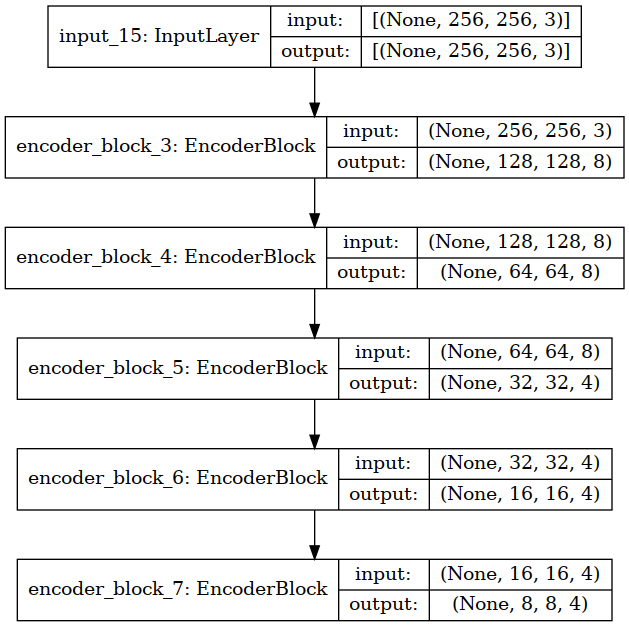

In [20]:
utils.plot_model(encoder)

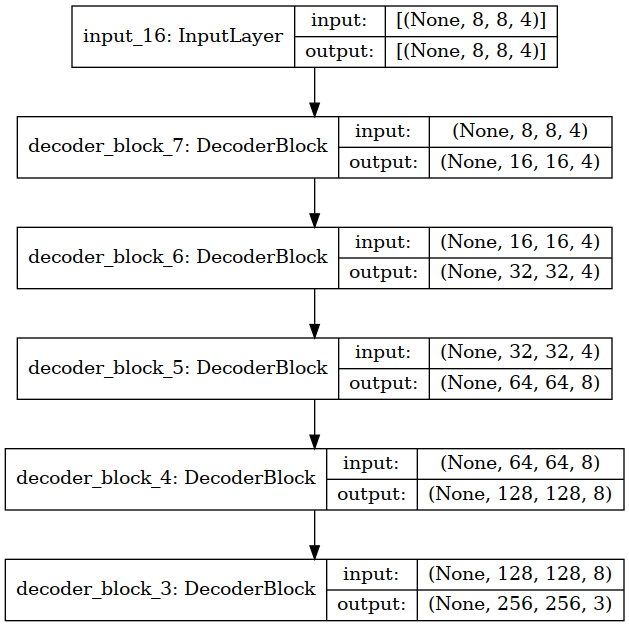

In [21]:
utils.plot_model(decoder)

In [22]:
X_test_batch,_ = next(test_generator)

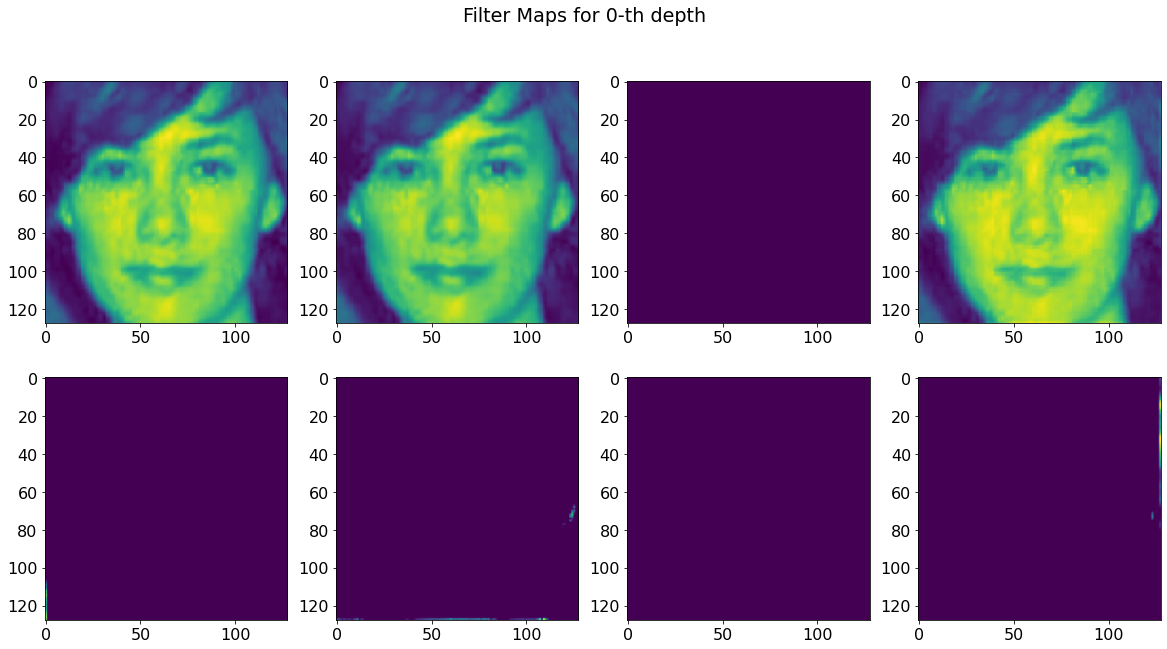

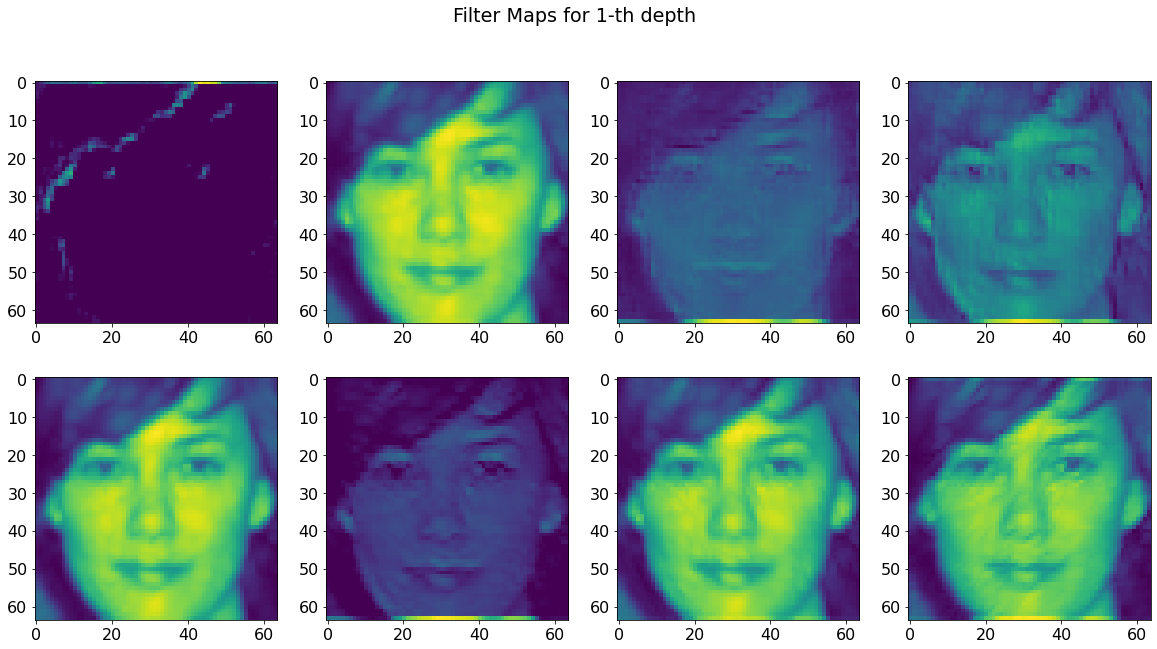

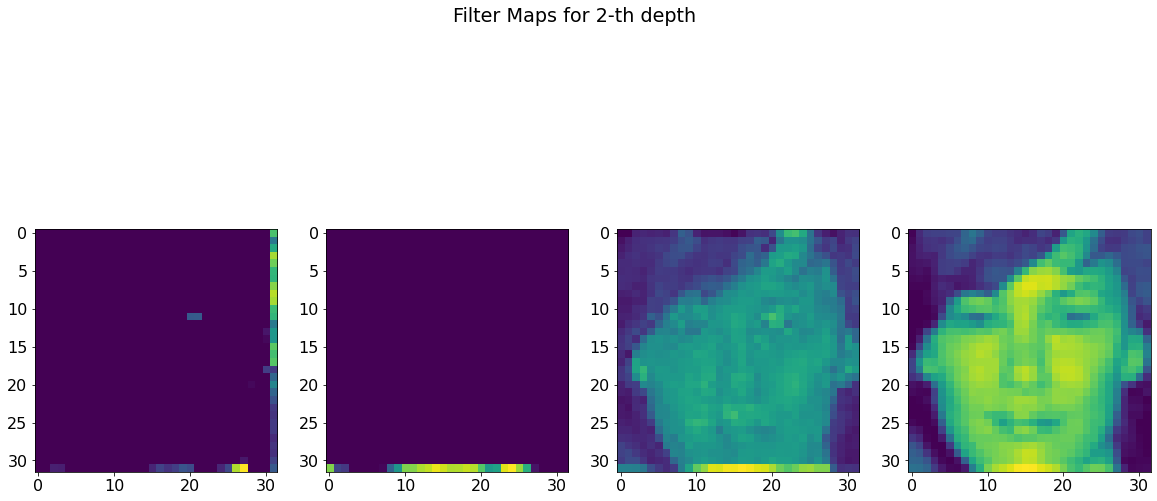

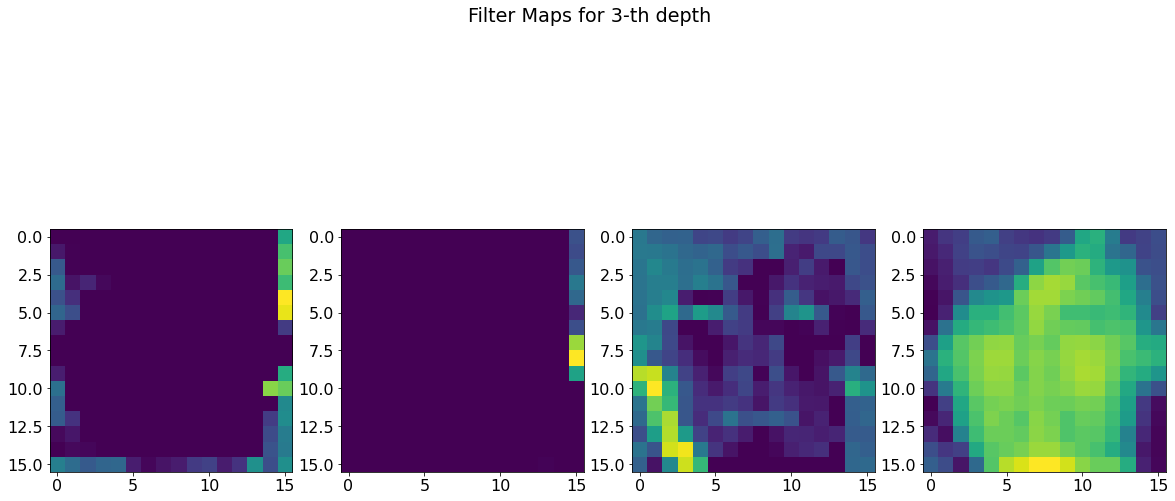

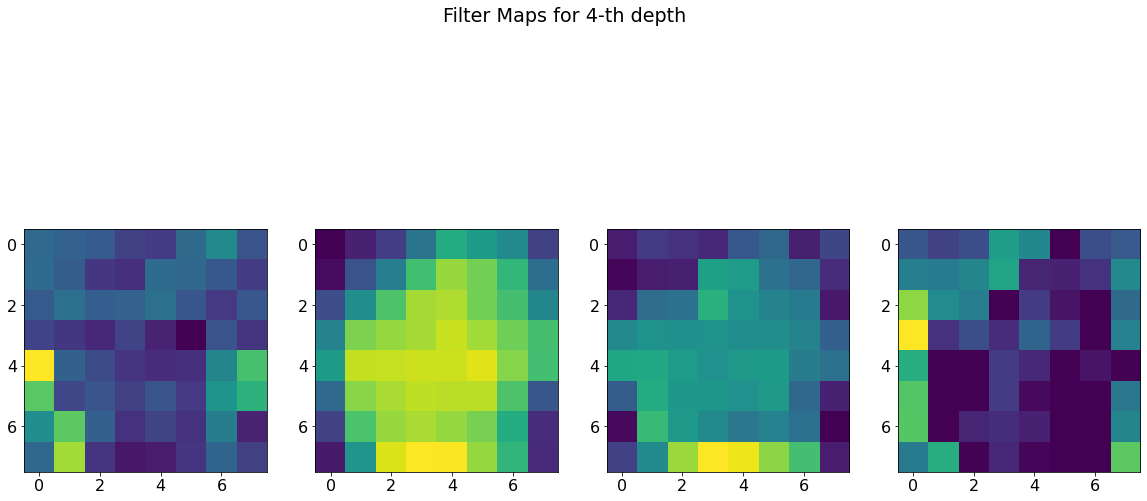

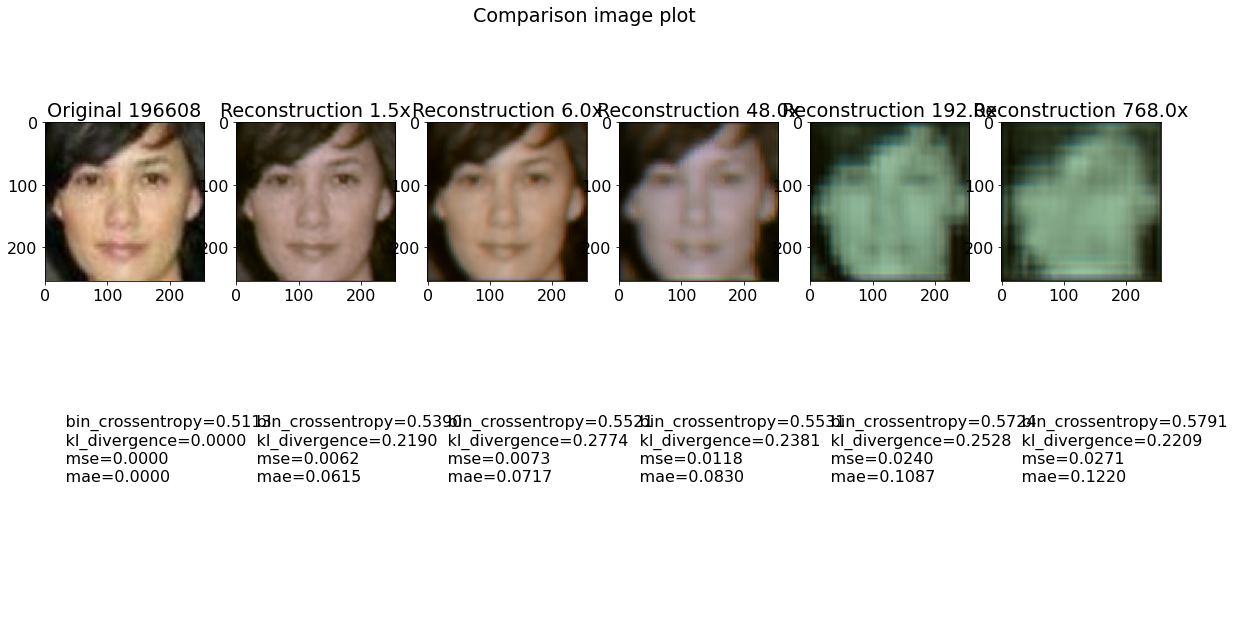

In [23]:
utils.get_image_autoencoder_analysis(X_test_batch[0],encoder,decoder)

## sigmoid noisy

In [24]:
autoencoder_factory_sigmoid = IncrementalAutoencoderFactory([8,8,4,4,4],(256,256,3),
                            encoder_block_params={"activation":"sigmoid"},
                            decoder_block_params={"activation":"sigmoid"})

In [25]:
autoencoder_factory_sigmoid.build()
autoencoder_factory_sigmoid.fit_factory(train_generator,validation_generator,1)

625/625 [==============================] - 74s 117ms/step - loss: 0.5971 - mse: 0.0320 - kl_divergence: 0.0926 - val_loss: 0.5300 - val_mse: 0.0050 - val_kl_divergence: -0.0530


  0%|          | 0/4 [00:00<?, ?it/s]

625/625 [==============================] - 72s 115ms/step - loss: 0.6344 - mse: 0.0471 - kl_divergence: 0.2919 - val_loss: 0.5425 - val_mse: 0.0097 - val_kl_divergence: -0.0469


 25%|██▌       | 1/4 [01:12<03:37, 72.63s/it]

625/625 [==============================] - 71s 112ms/step - loss: 0.6251 - mse: 0.0444 - kl_divergence: 0.1184 - val_loss: 0.5610 - val_mse: 0.0168 - val_kl_divergence: 0.0273


 50%|█████     | 2/4 [02:23<02:24, 72.13s/it]

625/625 [==============================] - 70s 111ms/step - loss: 0.6791 - mse: 0.0680 - kl_divergence: 0.5236 - val_loss: 0.5812 - val_mse: 0.0247 - val_kl_divergence: 0.0492


 75%|███████▌  | 3/4 [03:33<01:11, 71.59s/it]

625/625 [==============================] - 70s 111ms/step - loss: 0.6667 - mse: 0.0636 - kl_divergence: 0.0928 - val_loss: 0.6012 - val_mse: 0.0336 - val_kl_divergence: 0.0841


100%|██████████| 4/4 [04:44<00:00, 71.14s/it]


In [26]:
autoencoder_factory_sigmoid.autoencoders[2].evaluate(test_generator)

62/62 [==============================] - 5s 74ms/step - loss: 0.5642 - mse: 0.0164 - kl_divergence: 0.0193


[0.5641514658927917, 0.01635504886507988, 0.01930832676589489]

In [27]:
encoder_sigmoid,decoder_sigmoid = autoencoder_factory_sigmoid.get_encoder_decoder(4)

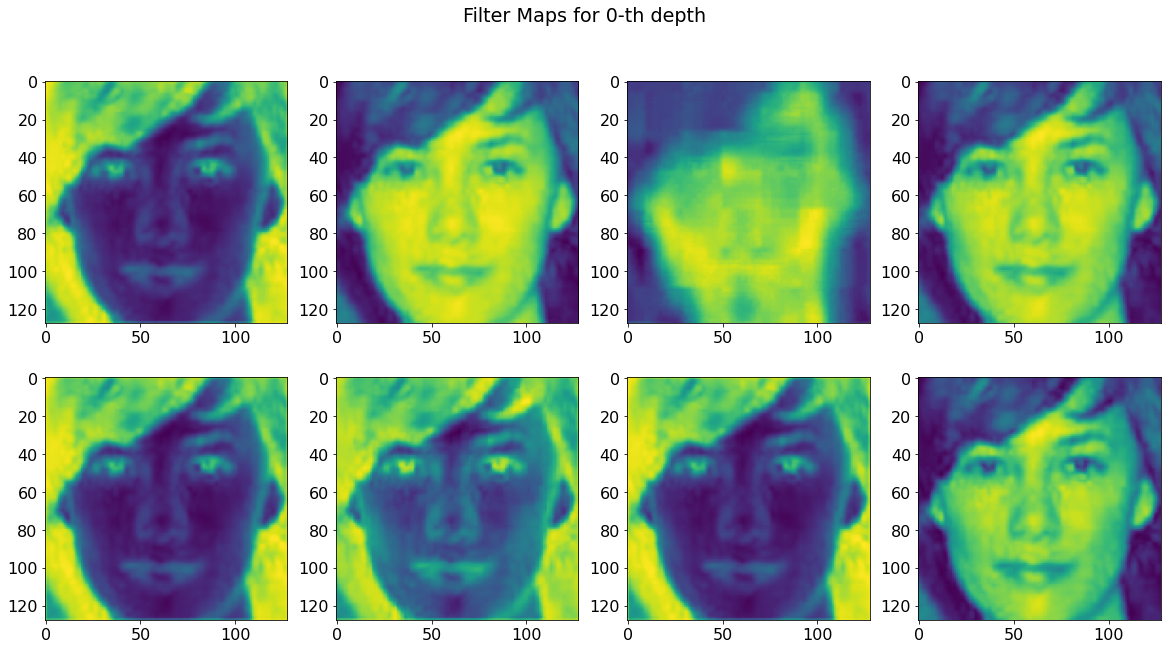

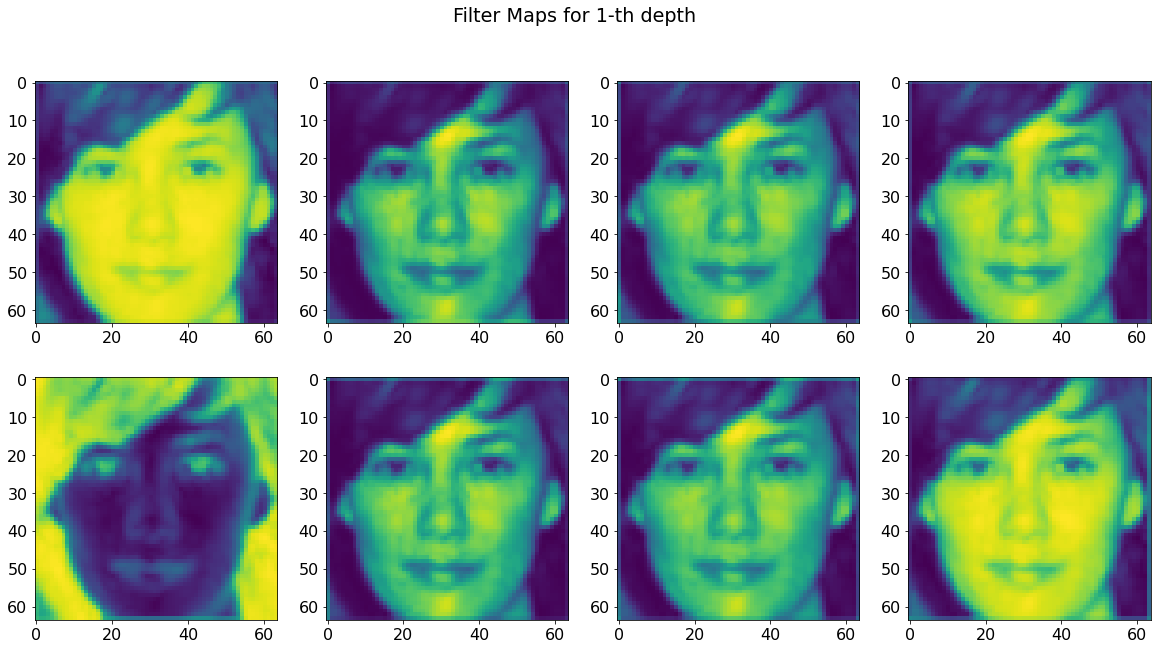

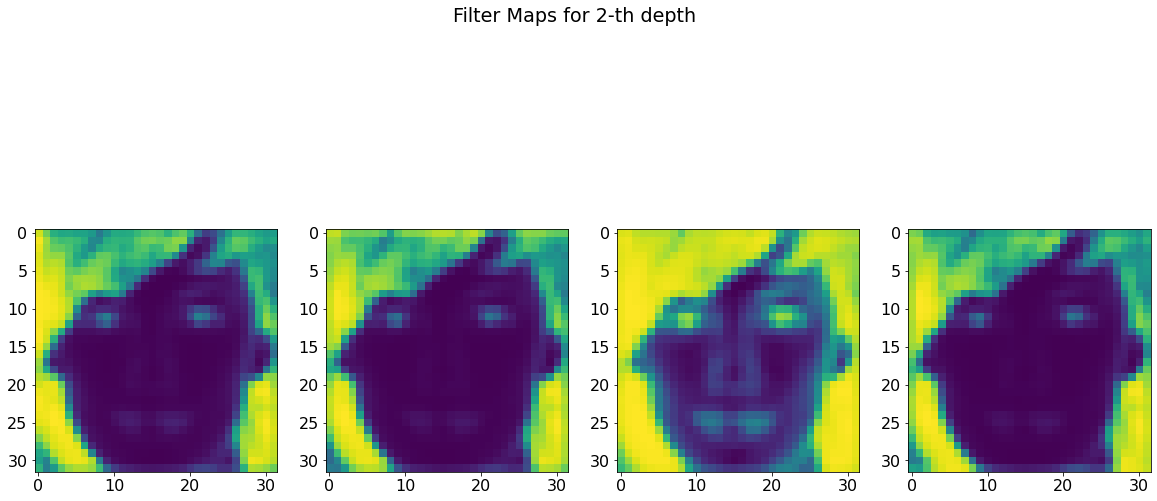

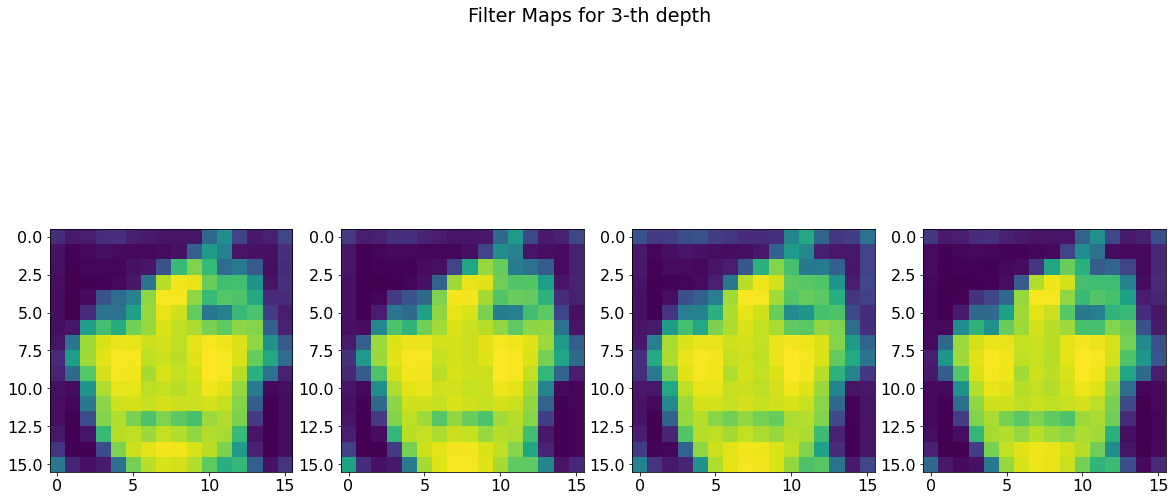

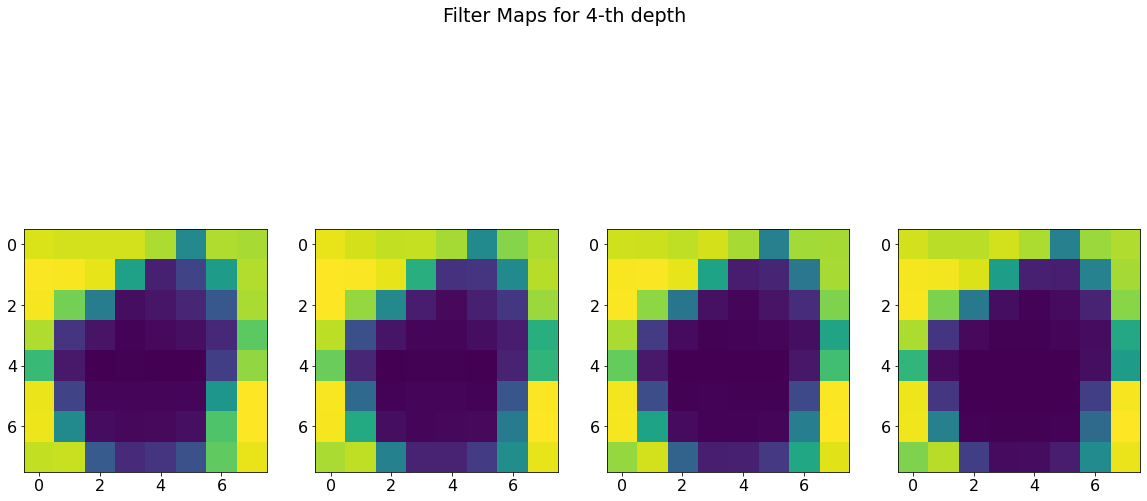

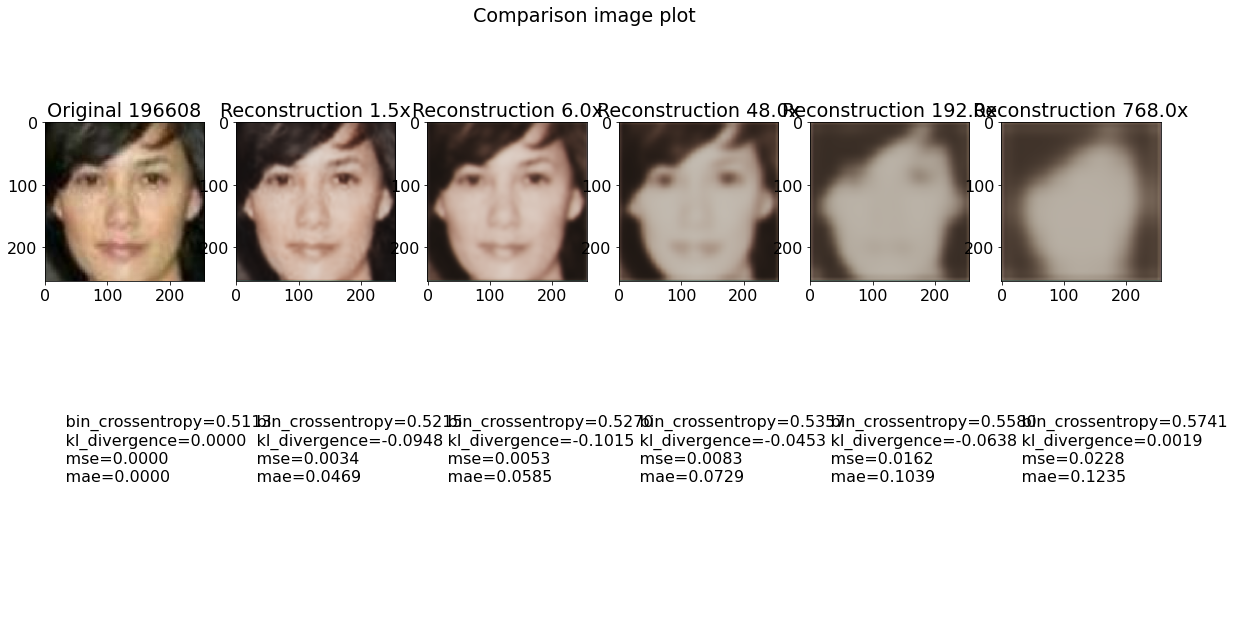

In [28]:
utils.get_image_autoencoder_analysis(X_test_batch[0],encoder_sigmoid,
                                     decoder_sigmoid)

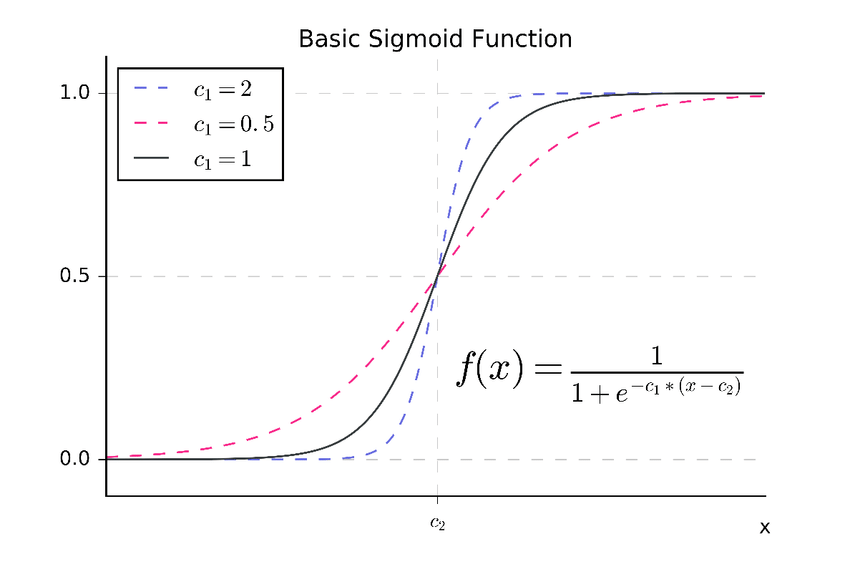 sigmoid picture

# classification

## data

In [95]:
train_generator_classify = train_datagen.flow_from_directory('data/Train/',
                                        batch_size=16,
                                        class_mode="categorical")
validation_generator_classify = validation_datagen.flow_from_directory('data/Validation/',
                                        batch_size=16,
                                        class_mode="categorical",)
test_generator_classify = test_datagen.flow_from_directory('data/Test/',
                                        batch_size=16,
                                        class_mode="categorical")

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [30]:
def generator_to_data(data_generator,data_shape,num_classes,
                      percentage=0.03):
    number_of_images = 0
    max_number_of_images = int(percentage*data_generator.n)
    X = np.array([])
    y = np.array([])
    for X_batch,y_batch in tqdm(data_generator):
        X = np.append(X,X_batch)
        y = np.append(y,y_batch)
        number_of_images +=  X_batch.shape[0]
        if number_of_images>=max_number_of_images:
            break
    X = X.reshape(-1,*data_shape)
    y = y.reshape(-1,num_classes)
    del X_batch,y_batch
    gc.collect()
    return X,y

In [31]:
X_train,y_train = generator_to_data(train_generator_classify,(256,256,3),2,0.03)
X_val,y_val = generator_to_data(validation_generator_classify,(256,256,3),2,0.03)
X_test,y_test = generator_to_data(validation_generator_classify,(256,256,3),2,0.1)

  8%|▊         | 4/50 [00:00<00:01, 23.61it/s]


## encoding depth 3

In encoding depth-1 value is used instead actual depth due to index shift. 

In [380]:
X_train_encoded_sigmoid = autoencoder_factory_sigmoid.encode(X_train,2)
X_val_encoded_sigmoid = autoencoder_factory_sigmoid.encode(X_val,2)
X_test_encoded_sigmoid = autoencoder_factory_sigmoid.encode(X_test,2)

In [381]:
X_train_encoded_sigmoid.shape,X_train.shape

(TensorShape([304, 32, 32, 4]), (304, 256, 256, 3))

In [382]:
def get_baseline(data_shape,num_of_blocks,):
    inputs = tf.keras.Input(shape = data_shape)
    x = inputs
    for i in range(num_of_blocks):
        for _ in range(2):
            x = tf.keras.layers.Conv2D(8,kernel_size=(3,3),padding="same")(x)
#             x = tf.keras.layers.BatchNormalization()(x)
            x = tf.keras.layers.ReLU()(x)
            x = tf.keras.layers.MaxPool2D()(x)
        x = tf.keras.layers.Dropout(0.1)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(64)(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    outputs = tf.keras.layers.Dense(2,activation="softmax")(x)
    model = tf.keras.Model(inputs,outputs)
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=[ks.metrics.CategoricalAccuracy(),
                           ks.metrics.AUC(),
                           ks.metrics.Precision(),
                           ks.metrics.Recall()])
    return model

In [383]:
data_shape = X_train_encoded_sigmoid[0].shape
baseline_classifier_sigmoid_depth_3 = get_baseline(data_shape,2)

In [384]:
data_shape

TensorShape([32, 32, 4])

In [385]:
history_classifier_sigmoid_depth_3 = baseline_classifier_sigmoid_depth_3.fit(X_train_encoded_sigmoid,y_train,
                        validation_data=(X_val_encoded_sigmoid,y_val),
                        epochs=100,callbacks=[
                            ks.callbacks.EarlyStopping(patience = 3),
                            ks.callbacks.TerminateOnNaN(),
                            ks.callbacks.ReduceLROnPlateau(),
                            ks.callbacks.ModelCheckpoint("./classifiers/encoder_3/best_sigmoid_model.h5",
                                                        save_best_only=True,
                                                        monitor= "val_categorical_accuracy",),
                            ks.callbacks.TensorBoard(log_dir='./logs/classifier/encoder_3/sigmoid/tboard')
                        ])

Epoch 1/100
10/10 [==============================] - 2s 101ms/step - loss: 0.6938 - categorical_accuracy: 0.5236 - auc_33: 0.5163 - precision_33: 0.5236 - recall_33: 0.5236 - val_loss: 0.6917 - val_categorical_accuracy: 0.5938 - val_auc_33: 0.5537 - val_precision_33: 0.5938 - val_recall_33: 0.5938
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6854 - categorical_accuracy: 0.6278 - auc_33: 0.6132 - precision_33: 0.6278 - recall_33: 0.6278 - val_loss: 0.6878 - val_categorical_accuracy: 0.5625 - val_auc_33: 0.6016 - val_precision_33: 0.5625 - val_recall_33: 0.5625
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6720 - categorical_accuracy: 0.6423 - auc_33: 0.6953 - precision_33: 0.6423 - recall_33: 0.6423 - val_loss: 0.6824 - val_categorical_accuracy: 0.5938 - val_auc_33: 0.6431 - val_precision_33: 0.5938 - val_recall_33: 0.5938
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6570 - categorical_accuracy: 0.6

In [386]:
baseline_classifier_sigmoid_depth_3 = ks.models.load_model("./classifiers/encoder_3/best_sigmoid_model.h5")

In [387]:
test_metrics_sigmoid_depth_3=  baseline_classifier_sigmoid_depth_3.evaluate(X_test_encoded_sigmoid,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.6903 - categorical_accuracy: 0.5875 - auc_33: 0.6027 - precision_33: 0.5875 - recall_33: 0.5875


In [388]:
df_history_classifier_sigmoid_depth_3 = pd.DataFrame(history_classifier_sigmoid_depth_3.history)

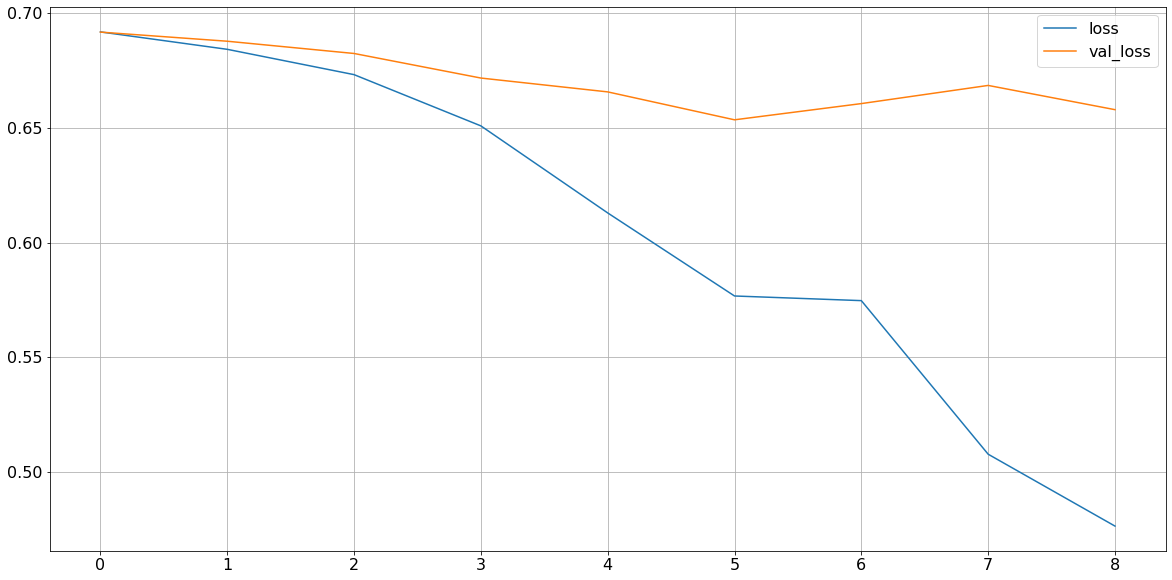

In [389]:
df_history_classifier_sigmoid_depth_3[["loss","val_loss"]].plot()
plt.grid();

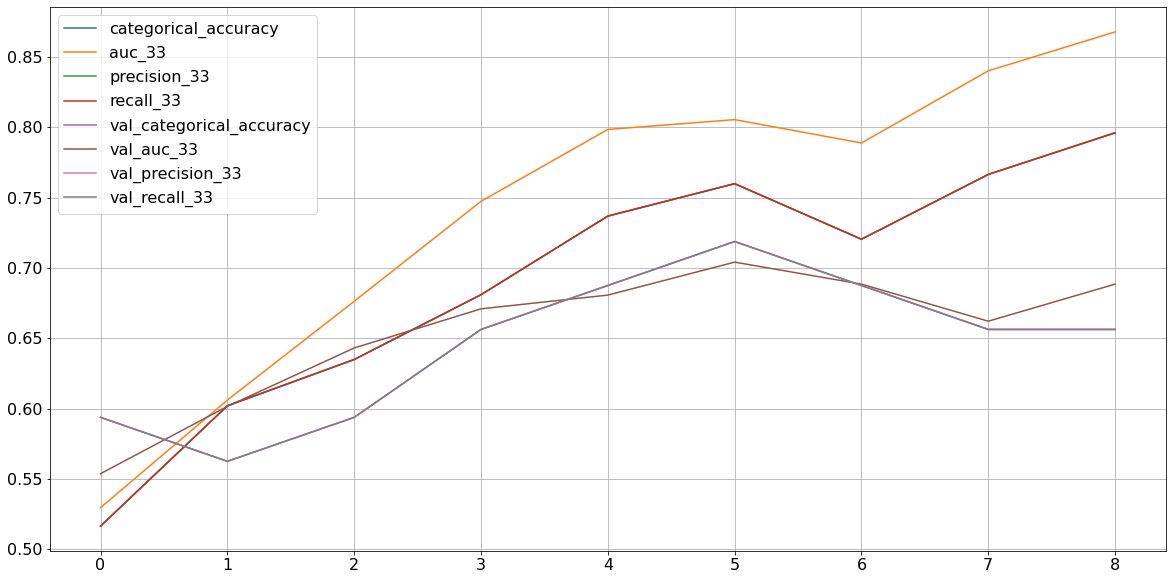

In [390]:
df_history_classifier_sigmoid_depth_3.drop(["lr","loss","val_loss"],axis=1).plot()
plt.grid()

## encoding depth 2

In [391]:
gc.collect()

42676

In [392]:
X_train_encoded_sigmoid = autoencoder_factory_sigmoid.encode(X_train,1)
X_val_encoded_sigmoid = autoencoder_factory_sigmoid.encode(X_val,1)
X_test_encoded_sigmoid = autoencoder_factory_sigmoid.encode(X_test,1)

gc.collect()

20

In [393]:
data_shape = X_train_encoded_sigmoid[0].shape
baseline_classifier_sigmoid_depth_2 = get_baseline(data_shape,2)

In [394]:
data_shape

TensorShape([64, 64, 8])

In [395]:
history_classifier_sigmoid_depth_2 = baseline_classifier_sigmoid_depth_2.fit(
                        X_train_encoded_sigmoid,y_train,
                        validation_data=(X_val_encoded_sigmoid,y_val),
                        epochs=100,callbacks=[
                            ks.callbacks.EarlyStopping(patience = 3),
                            ks.callbacks.TerminateOnNaN(),
                            ks.callbacks.ReduceLROnPlateau(),
                            ks.callbacks.ModelCheckpoint("./classifiers/encoder_2/best_sigmoid_model.h5",
                                                        save_best_only=True,
                                                        monitor= "val_categorical_accuracy"),
                            ks.callbacks.TensorBoard(log_dir='./logs/classifier/encoder_2/sigmoid/tboard')
                        ])

Epoch 1/100
10/10 [==============================] - 2s 112ms/step - loss: 0.7026 - categorical_accuracy: 0.4614 - auc_34: 0.4597 - precision_34: 0.4614 - recall_34: 0.4614 - val_loss: 0.6939 - val_categorical_accuracy: 0.5312 - val_auc_34: 0.4707 - val_precision_34: 0.5312 - val_recall_34: 0.5312
Epoch 2/100
10/10 [==============================] - 0s 14ms/step - loss: 0.6901 - categorical_accuracy: 0.5132 - auc_34: 0.5449 - precision_34: 0.5132 - recall_34: 0.5132 - val_loss: 0.6931 - val_categorical_accuracy: 0.4062 - val_auc_34: 0.5176 - val_precision_34: 0.4062 - val_recall_34: 0.4062
Epoch 3/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6827 - categorical_accuracy: 0.5750 - auc_34: 0.6470 - precision_34: 0.5750 - recall_34: 0.5750 - val_loss: 0.6887 - val_categorical_accuracy: 0.5312 - val_auc_34: 0.5703 - val_precision_34: 0.5312 - val_recall_34: 0.5312
Epoch 4/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6737 - categorical_accuracy: 

In [396]:
baseline_classifier_sigmoid_depth_2 = ks.models.load_model("./classifiers/encoder_2/best_sigmoid_model.h5")

In [397]:
test_metrics_sigmoid_depth_2 = baseline_classifier_sigmoid_depth_2.evaluate(X_test_encoded_sigmoid,y_test);

3/3 [==============================] - 0s 6ms/step - loss: 0.2827 - categorical_accuracy: 0.9000 - auc_34: 0.9513 - precision_34: 0.9000 - recall_34: 0.9000


In [398]:
df_history_classifier_sigmoid_depth_2 = pd.DataFrame(history_classifier_sigmoid_depth_2.history)

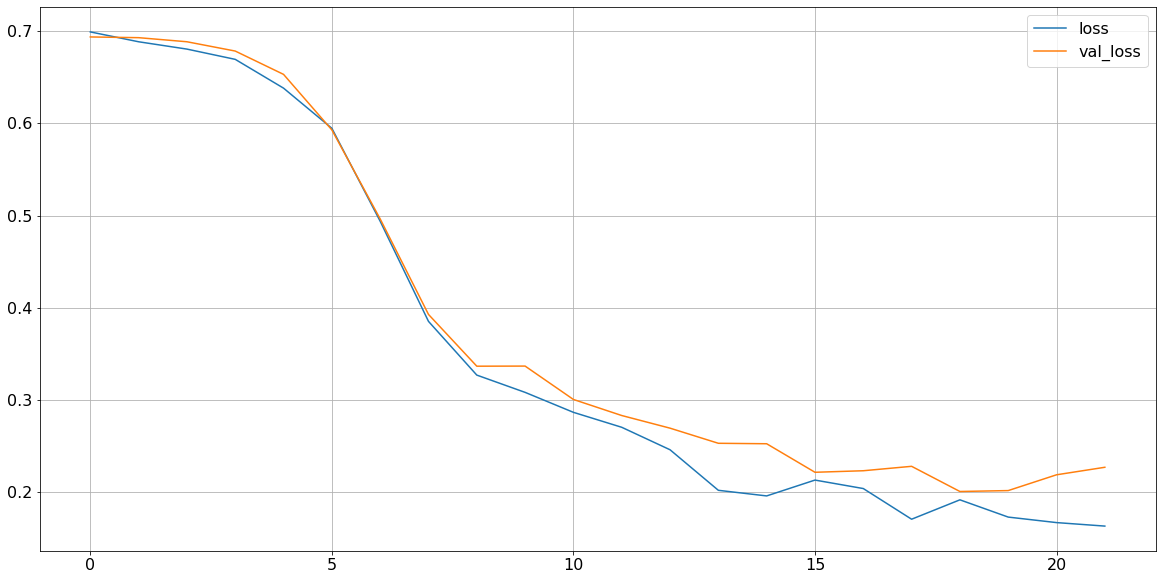

In [399]:
df_history_classifier_sigmoid_depth_2[["loss","val_loss"]].plot()
plt.grid();

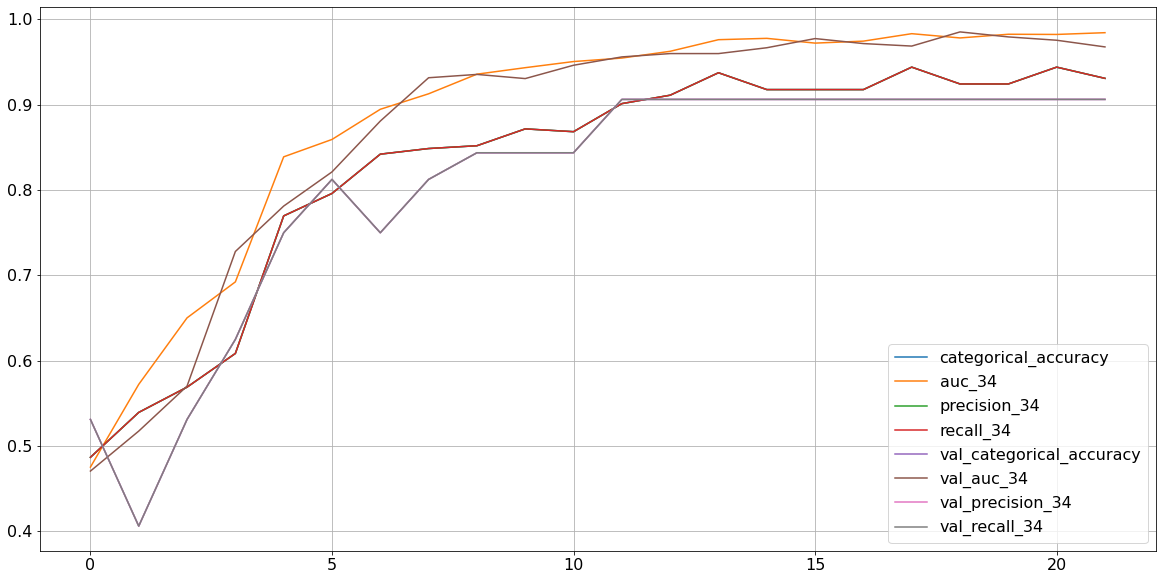

In [400]:
df_history_classifier_sigmoid_depth_2.drop(["lr","loss","val_loss"],axis=1).plot()
plt.grid()

## encoding depth 1

In [401]:
gc.collect()

21464

In [402]:
X_train_encoded_sigmoid = autoencoder_factory_sigmoid.encode(X_train,0)
X_val_encoded_sigmoid = autoencoder_factory_sigmoid.encode(X_val,0)
X_test_encoded_sigmoid = autoencoder_factory_sigmoid.encode(X_test,0)

gc.collect()

20

In [403]:
data_shape = X_train_encoded_sigmoid[0].shape
baseline_classifier_sigmoid_depth_1 = get_baseline(data_shape,2)

In [404]:
data_shape

TensorShape([128, 128, 8])

In [405]:
history_classifier_sigmoid_depth_1 = baseline_classifier_sigmoid_depth_1.fit(
                        X_train_encoded_sigmoid,y_train,
                        validation_data=(X_val_encoded_sigmoid,y_val),
                        epochs=100,callbacks=[
                            ks.callbacks.EarlyStopping(patience = 3),
                            ks.callbacks.TerminateOnNaN(),
                            ks.callbacks.ReduceLROnPlateau(),
                            ks.callbacks.ModelCheckpoint("./classifiers/encoder_1/best_sigmoid_model.h5",
                                                        save_best_only=True,
                                                        monitor= "val_categorical_accuracy"),
                            ks.callbacks.TensorBoard(log_dir='./logs/classifier/encoder_1/sigmoid/tboard')
                        ])

Epoch 1/100
10/10 [==============================] - 2s 137ms/step - loss: 0.6933 - categorical_accuracy: 0.5347 - auc_35: 0.5493 - precision_35: 0.5347 - recall_35: 0.5347 - val_loss: 0.7209 - val_categorical_accuracy: 0.4688 - val_auc_35: 0.5039 - val_precision_35: 0.4688 - val_recall_35: 0.4688
Epoch 2/100
10/10 [==============================] - 0s 37ms/step - loss: 0.6939 - categorical_accuracy: 0.5339 - auc_35: 0.5590 - precision_35: 0.5339 - recall_35: 0.5339 - val_loss: 0.6417 - val_categorical_accuracy: 0.6875 - val_auc_35: 0.7798 - val_precision_35: 0.6875 - val_recall_35: 0.6875
Epoch 3/100
10/10 [==============================] - 0s 37ms/step - loss: 0.5589 - categorical_accuracy: 0.7527 - auc_35: 0.8339 - precision_35: 0.7527 - recall_35: 0.7527 - val_loss: 0.5292 - val_categorical_accuracy: 0.7188 - val_auc_35: 0.8477 - val_precision_35: 0.7188 - val_recall_35: 0.7188
Epoch 4/100
10/10 [==============================] - 0s 39ms/step - loss: 0.4326 - categorical_accuracy: 

In [406]:
baseline_classifier_sigmoid_depth_1 = ks.models.load_model("./classifiers/encoder_1/best_sigmoid_model.h5")

In [407]:
test_metrics_sigmoid_depth_1 = baseline_classifier_sigmoid_depth_1.evaluate(X_test_encoded_sigmoid,y_test)

3/3 [==============================] - 0s 13ms/step - loss: 0.2136 - categorical_accuracy: 0.9250 - auc_35: 0.9845 - precision_35: 0.9250 - recall_35: 0.9250


In [408]:
df_history_classifier_sigmoid_depth_1 = pd.DataFrame(history_classifier_sigmoid_depth_1.history)

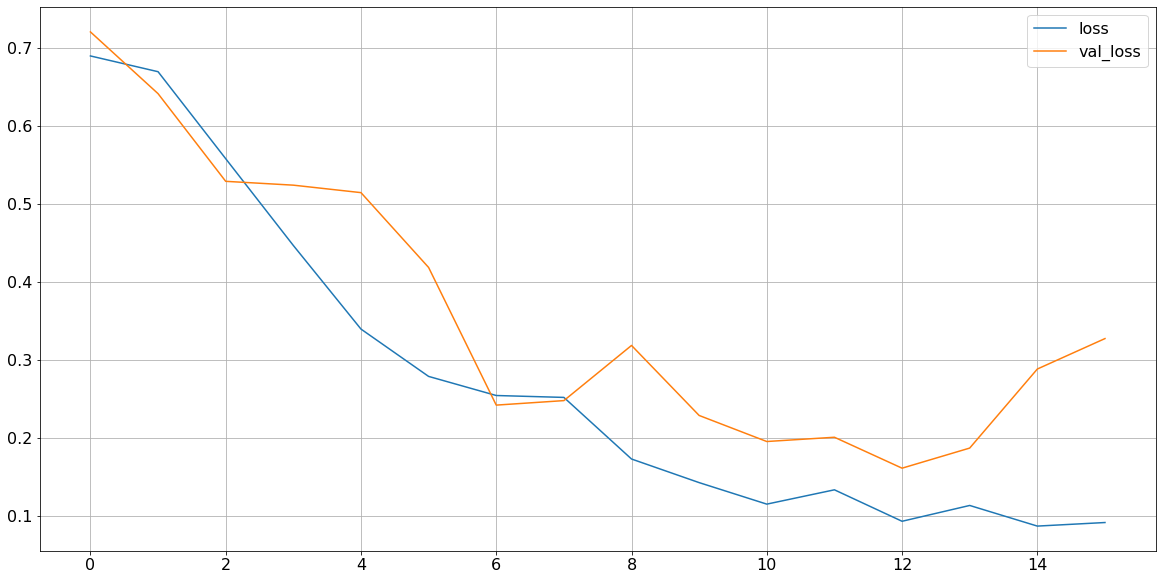

In [409]:
df_history_classifier_sigmoid_depth_1[["loss","val_loss"]].plot()
plt.grid();

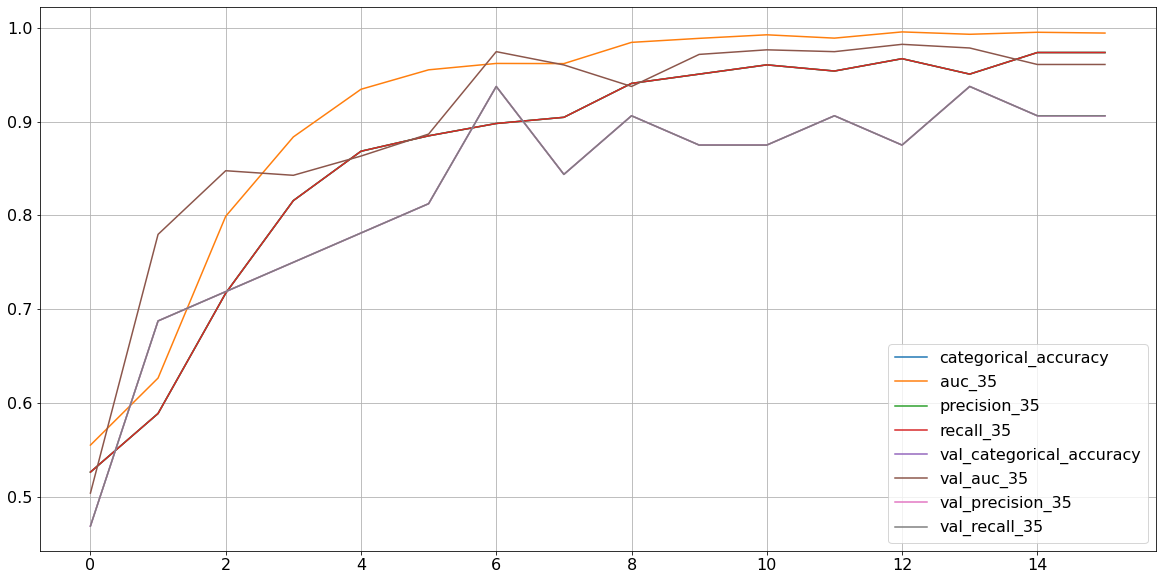

In [410]:
df_history_classifier_sigmoid_depth_1.drop(["lr","loss","val_loss"],axis=1).plot()
plt.grid()

## no encoding

In [411]:
# del X_train_encoded_sigmoid,X_test_encoded_sigmoid,X_val_encoded_sigmoid
gc.collect()

21873

In [412]:
data_shape = X_train[0].shape
baseline_classifier = get_baseline(data_shape,2)

In [413]:
data_shape

(256, 256, 3)

In [414]:
history_classifier = baseline_classifier.fit(
                        X_train,y_train,
                        validation_data=(X_val,y_val),
                        epochs=100,callbacks=[
                            ks.callbacks.EarlyStopping(patience = 3),
                            ks.callbacks.TerminateOnNaN(),
                            ks.callbacks.ModelCheckpoint("./classifiers/no_encoding/best_model.h5",
                                                        monitor= "val_categorical_accuracy",
                                                        save_best_only=True,),
                            ks.callbacks.TensorBoard(log_dir='./logs/classifier/no_encoding/tboard')
                        ])

Epoch 1/100
10/10 [==============================] - 3s 193ms/step - loss: 0.6837 - categorical_accuracy: 0.5001 - auc_36: 0.5442 - precision_36: 0.5001 - recall_36: 0.5001 - val_loss: 0.6153 - val_categorical_accuracy: 0.9062 - val_auc_36: 0.9526 - val_precision_36: 0.9062 - val_recall_36: 0.9062
Epoch 2/100
10/10 [==============================] - 1s 91ms/step - loss: 0.5148 - categorical_accuracy: 0.8320 - auc_36: 0.9220 - precision_36: 0.8320 - recall_36: 0.8320 - val_loss: 0.3190 - val_categorical_accuracy: 0.9062 - val_auc_36: 0.9727 - val_precision_36: 0.9062 - val_recall_36: 0.9062
Epoch 3/100
10/10 [==============================] - 1s 91ms/step - loss: 0.2938 - categorical_accuracy: 0.8832 - auc_36: 0.9615 - precision_36: 0.8832 - recall_36: 0.8832 - val_loss: 0.1836 - val_categorical_accuracy: 0.9375 - val_auc_36: 0.9883 - val_precision_36: 0.9375 - val_recall_36: 0.9375
Epoch 4/100
10/10 [==============================] - 1s 90ms/step - loss: 0.1653 - categorical_accuracy: 

In [415]:
baseline_classifier = ks.models.load_model("./classifiers/no_encoding/best_model.h5")

In [416]:
test_metrics = baseline_classifier.evaluate(X_test,y_test)

3/3 [==============================] - 0s 29ms/step - loss: 0.1815 - categorical_accuracy: 0.9250 - auc_36: 0.9902 - precision_36: 0.9250 - recall_36: 0.9250


In [417]:
df_history_classifier = pd.DataFrame(history_classifier.history)

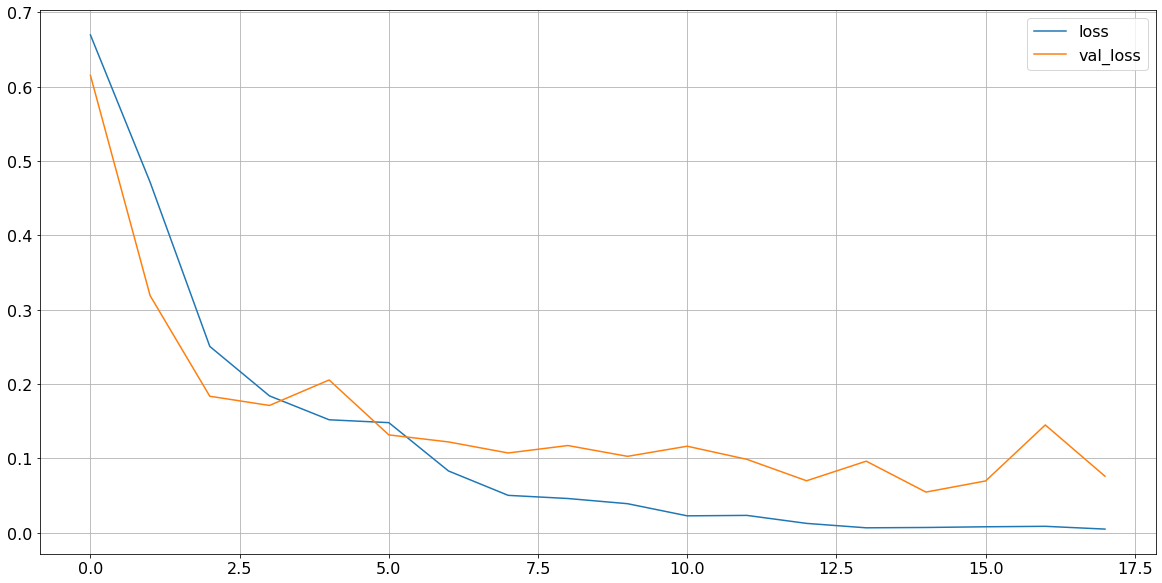

In [418]:
df_history_classifier[["loss","val_loss"]].plot()
plt.grid();

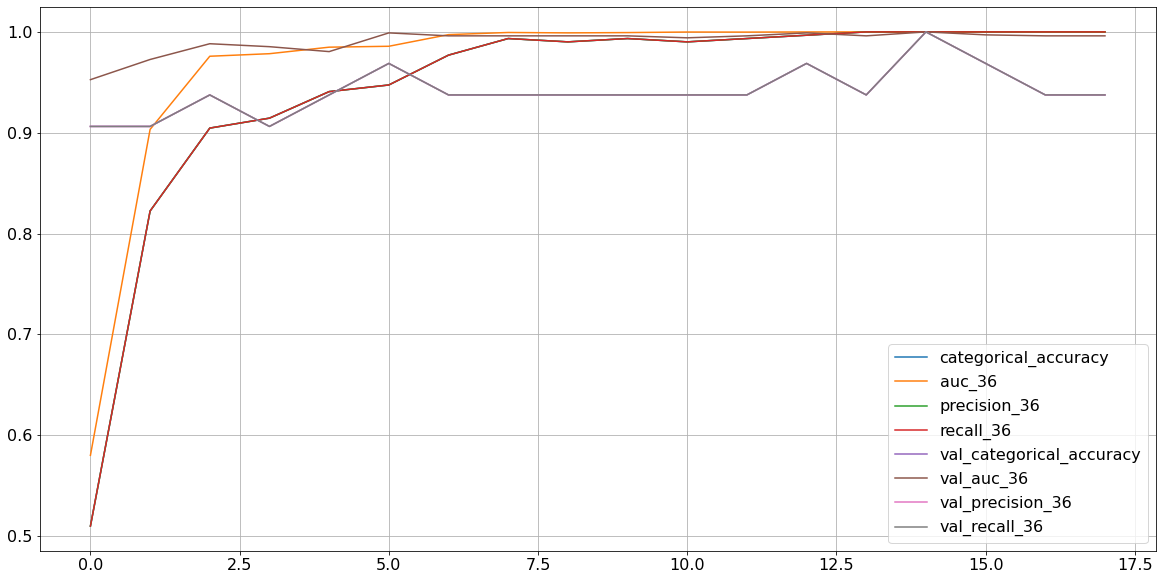

In [419]:
df_history_classifier.drop(["loss","val_loss"],axis=1).plot()
plt.grid()

In [420]:
df_test_metrics = pd.DataFrame([test_metrics,test_metrics_sigmoid_depth_1,test_metrics_sigmoid_depth_2,test_metrics_sigmoid_depth_3],
            columns = ["loss","categorical_accuracy","auc","precision","recall"])

In [421]:
df_test_metrics.style.background_gradient()

In [422]:
df_history_classifier.tail(5).style.background_gradient()

In [423]:
df_history_classifier_sigmoid_depth_1.tail(5).style.background_gradient()

In [424]:
df_history_classifier_sigmoid_depth_2.tail(5).style.background_gradient()

In [425]:
df_history_classifier_sigmoid_depth_3.tail(5).style.background_gradient()

# Hash

In [426]:
gc.collect()

21934

In [427]:
X_train_encoded_sigmoid = autoencoder_factory_sigmoid.encode(X_train,1)
X_val_encoded_sigmoid = autoencoder_factory_sigmoid.encode(X_val,1)
X_test_encoded_sigmoid = autoencoder_factory_sigmoid.encode(X_test,1)
gc.collect()

20

By default, all autoencoders before were trained as denoising autoencoders. For this task, one more non-denoising autoencoder is required

You can see an image of denoising-autoencoder at the image below.

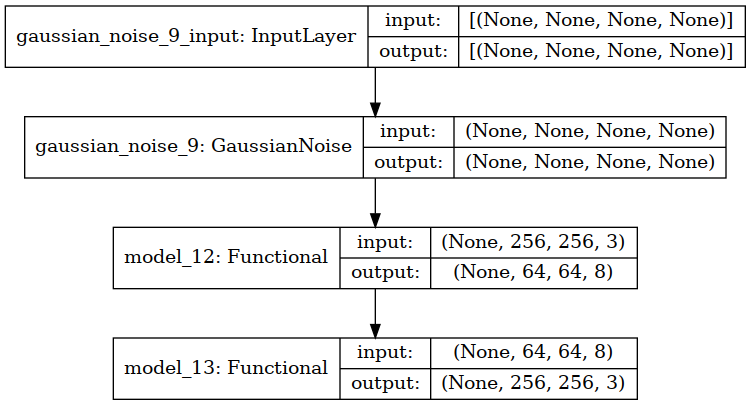

In [441]:
utils.plot_model(autoencoder_factory_sigmoid.autoencoders[1])

It's necessary to claim that GaussianNoise don't have to be a part of the encoder. 

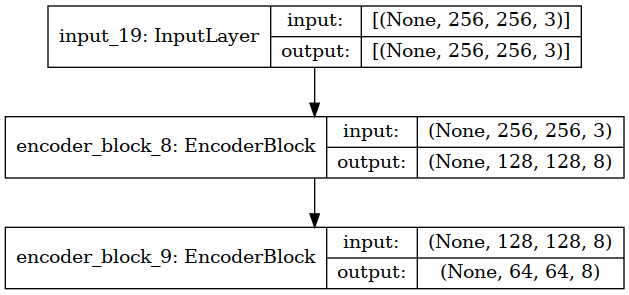

In [436]:
utils.plot_model(autoencoder_factory_sigmoid.encoders[1])

In [459]:
autoencoder_factory_sigmoid_non_denoise = AutoEncoderFactory.IncrementalAutoencoderFactory([8,8,4,4,4],
                                (256,256,3),
                              encoder_block_params={"activation":"sigmoid"},
                              decoder_block_params={"activation":"sigmoid"},
                             noisy=False)

In [460]:
autoencoder_factory_sigmoid_non_denoise.build()

In [461]:
autoencoder_factory_sigmoid_non_denoise.autoencoders[0].layers

In [462]:
autoencoder_factory_sigmoid_non_denoise.fit_factory(train_generator,
                                                    validation_generator,
                                                    epochs=2)

Epoch 1/2
625/625 [==============================] - 73s 116ms/step - loss: 0.6002 - mse: 0.0333 - kl_divergence: 0.0987 - val_loss: 0.5278 - val_mse: 0.0040 - val_kl_divergence: 0.0279
Epoch 2/2
625/625 [==============================] - 72s 115ms/step - loss: 0.5272 - mse: 0.0031 - kl_divergence: 0.0186 - val_loss: 0.5235 - val_mse: 0.0026 - val_kl_divergence: 0.0226


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/2
625/625 [==============================] - 72s 115ms/step - loss: 0.6182 - mse: 0.0409 - kl_divergence: 0.2153 - val_loss: 0.5339 - val_mse: 0.0064 - val_kl_divergence: -0.0520
Epoch 2/2
625/625 [==============================] - 72s 115ms/step - loss: 0.5317 - mse: 0.0048 - kl_divergence: 0.0280 - val_loss: 0.5310 - val_mse: 0.0055 - val_kl_divergence: -0.0653


 25%|██▌       | 1/4 [02:24<07:12, 144.30s/it]

Epoch 1/2
625/625 [==============================] - 70s 111ms/step - loss: 0.6188 - mse: 0.0421 - kl_divergence: 0.1574 - val_loss: 0.5547 - val_mse: 0.0146 - val_kl_divergence: 0.0057
Epoch 2/2
625/625 [==============================] - 70s 112ms/step - loss: 0.5480 - mse: 0.0118 - kl_divergence: 0.0751 - val_loss: 0.5423 - val_mse: 0.0096 - val_kl_divergence: -0.0344


 50%|█████     | 2/4 [04:44<04:46, 143.02s/it]

Epoch 1/2
625/625 [==============================] - 70s 111ms/step - loss: 0.6933 - mse: 0.0720 - kl_divergence: 0.5654 - val_loss: 0.5713 - val_mse: 0.0208 - val_kl_divergence: 0.0088
Epoch 2/2
625/625 [==============================] - 69s 110ms/step - loss: 0.5681 - mse: 0.0183 - kl_divergence: 0.0845 - val_loss: 0.5659 - val_mse: 0.0188 - val_kl_divergence: -0.0127


 75%|███████▌  | 3/4 [07:03<02:21, 141.88s/it]

Epoch 1/2
625/625 [==============================] - 72s 111ms/step - loss: 0.6831 - mse: 0.0712 - kl_divergence: 0.0412 - val_loss: 0.5932 - val_mse: 0.0304 - val_kl_divergence: 0.0387
Epoch 2/2
625/625 [==============================] - 69s 111ms/step - loss: 0.5906 - mse: 0.0284 - kl_divergence: 0.1163 - val_loss: 0.5905 - val_mse: 0.0294 - val_kl_divergence: 0.0285


100%|██████████| 4/4 [09:25<00:00, 141.33s/it]


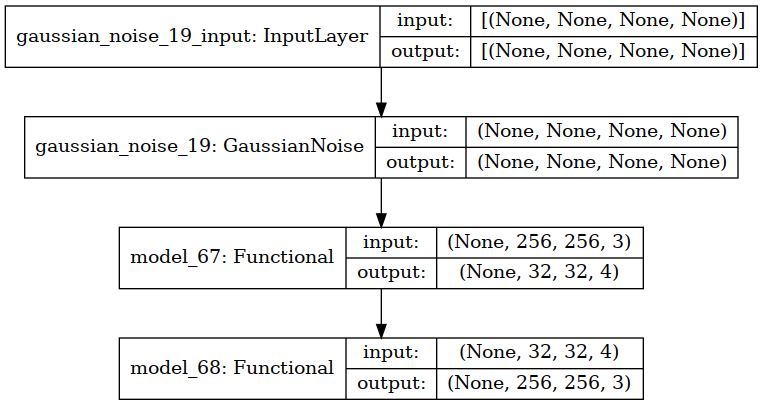

In [463]:
utils.plot_model(autoencoder_factory_sigmoid_non_denoise.autoencoders[2])

In [484]:
X_test_encoded_sigmoid = autoencoder_factory_sigmoid.encode(X_test,1)

In [485]:
X_test_encoded_sigmoid_non_denoise = autoencoder_factory_sigmoid_non_denoise.encode(X_test,
                                                                                    1)

In [486]:
num_images_test = X_test_encoded_sigmoid.shape[0]
X_test_encoded_sigmoid.shape,X_test_encoded_sigmoid_non_denoise.shape

(TensorShape([80, 64, 64, 8]), TensorShape([80, 64, 64, 8]))

In [487]:
X_test_encoded_sigmoid_non_denoise_flatten = tf.reshape(
                                            X_test_encoded_sigmoid_non_denoise,
                                            (num_images_test,-1))
X_test_encoded_sigmoid_flatten = tf.reshape(X_test_encoded_sigmoid,
                                            (num_images_test,-1))

X_test_encoded_sigmoid_non_denoise_hash = np.round(X_test_encoded_sigmoid_non_denoise_flatten)
X_test_encoded_sigmoid_hash = np.round(X_test_encoded_sigmoid_flatten)

In [488]:
(X_test_encoded_sigmoid_non_denoise_hash==X_test_encoded_sigmoid_hash).all(axis=1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [491]:
(X_test_encoded_sigmoid_non_denoise_hash==X_test_encoded_sigmoid_hash).all(axis=1).any()

False

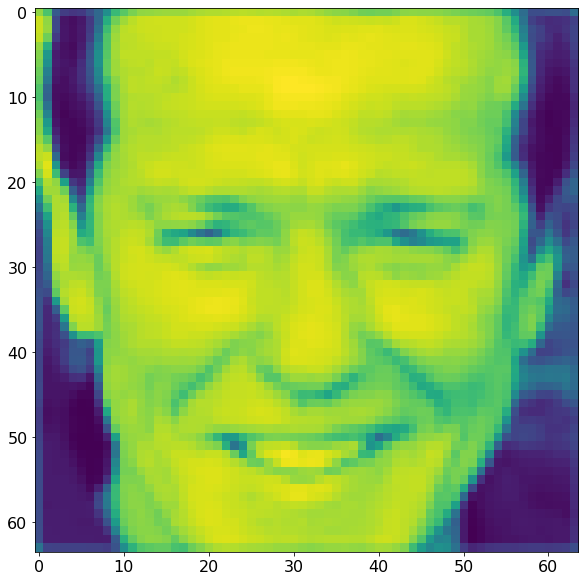

In [512]:
plt.imshow(X_test_encoded_sigmoid[1][:,:,3])

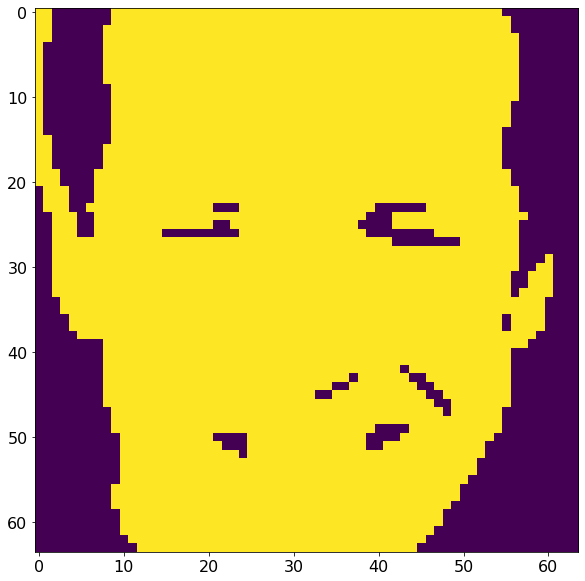

In [513]:
plt.imshow(X_test_encoded_sigmoid_hash[1].reshape(64,64,8)[:,:,3])

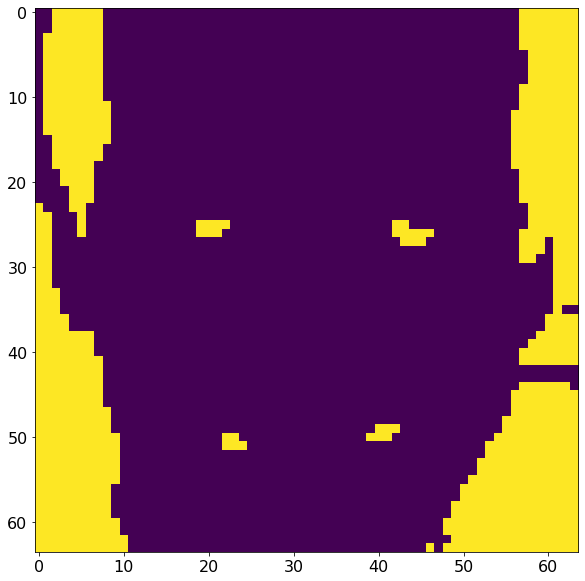

In [514]:
plt.imshow(X_test_encoded_sigmoid_non_denoise_hash[1].reshape(64,64,8)[:,:,3])

However, we can measure the difference between denoising and simple encoder

In [493]:
X_test_encoded_sigmoid_flatten = np.array(X_test_encoded_sigmoid_flatten)
X_test_encoded_sigmoid_non_denoise_flatten = np.array(X_test_encoded_sigmoid_non_denoise_flatten)

MSE originals test

In [497]:
((X_test_encoded_sigmoid_flatten-X_test_encoded_sigmoid_non_denoise_flatten)**2).mean(axis=1).mean(axis=0)

0.16057715

# hash of encoded image

In [647]:
X_test,y_test = next(test_generator_classify)

In [648]:
X_test_encoded = autoencoder_factory_sigmoid.encode(X_test,2)
X_test_encoded_non_denoise  = autoencoder_factory_sigmoid_non_denoise.encode(X_test,2)

In [649]:
num_images_test = len(X_test)

In [651]:
X_test_encoded_flatten = tf.reshape(X_test_encoded,(num_images_test,-1))
X_test_encoded_non_denoise_flatten = tf.reshape(X_test_encoded_non_denoise,
                                            (num_images_test,-1))

X_test_encoded_hash = np.round(X_test_encoded_flatten)
X_test_encoded_non_denoise_hash = np.round(X_test_encoded_non_denoise_flatten)

In [652]:
clustering_model_non_denoise = AgglomerativeClustering(n_clusters=2,
                                                       affinity="cosine",linkage="complete")
test_denoise_cluster_labels = clustering_model_non_denoise.fit_predict(X_test_encoded_non_denoise_hash)

clustering_model = AgglomerativeClustering(n_clusters=2,affinity="cosine",
                                           linkage="complete")
test_cluster_labels = clustering_model.fit_predict(X_test_encoded_hash)

In [653]:
test_cluster_labels,test_denoise_cluster_labels

(array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0]))

In [657]:
y_test = np.array(y_test[:,0],dtype=int)

In [660]:
def gini(arr):
    counts = np.unique(arr,return_counts=True)[1]
    return 1- np.sum((counts/arr.size)**2)

In [661]:
test_cluster_labels,test_denoise_cluster_labels

(array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0]))

In [664]:
gini(np.array((y_test==test_cluster_labels),dtype=int))

0.4921875

In [665]:
gini(np.array((y_test==test_denoise_cluster_labels),dtype=int))

0.46875

In [666]:
from sklearn.metrics import pairwise_distances   
import  seaborn as sns

In [741]:
X_test_encoded_distances = pairwise_distances(X_test_encoded_hash)
X_test_encoded_non_denoise_distances = pairwise_distances(X_test_encoded_non_denoise_hash)

In [742]:
def fill_inf_diag(orig_mat):
    return orig_mat + np.where(np.eye(orig_mat.shape[0])>0,np.inf,0)

In [743]:
X_test_encoded_distances = fill_inf_diag(X_test_encoded_distances)
X_test_encoded_non_denoise_distances = fill_inf_diag(X_test_encoded_non_denoise_distances)

In [744]:
argmins_X_test_encoded_non_denoise_distances = np.argmin(X_test_encoded_non_denoise_distances,axis=0)

In [745]:
argmins_X_test_encoded_distances = np.argmin(X_test_encoded_distances,axis=0)

In [746]:
from scipy.spatial.distance import hamming,cosine

In [739]:
def plot_hashed(X_test,argmins_1,argmins_2):
    fix,axs = plt.subplots(len(X_test),3,figsize=(20,50))
    data_shape = X_test[0].shape
    for i in range(len(X_test)):
        X_test_flatten_img = X_test[i].reshape(-1)
        X_test_flatten_img_1 = X_test[argmins_1[i]].reshape(-1)
        X_test_flatten_img_2 = X_test[argmins_2[i]].reshape(-1)
        
        hamming_sim_1 = np.round(hamming(X_test_flatten_img,X_test_flatten_img_1),3)
        hamming_sim_2 = np.round(hamming(X_test_flatten_img,X_test_flatten_img_2),3)
        cosine_sim_1 = np.round(1-cosine(X_test_flatten_img,X_test_flatten_img_1),3)
        cosine_sim_2 = np.round(1-cosine(X_test_flatten_img,X_test_flatten_img_2),3)
        
        axs[i][0].imshow(X_test[i])
        axs[i][1].imshow(X_test[argmins_1[i]],label=f"{hamming_sim_1} {cosine_sim_1} ")
        axs[i][2].imshow(X_test[argmins_2[i]],label=f"{hamming_sim_2} {cosine_sim_2} ")
#         axs[i][0].legend()
        axs[i][1].set_title(f"{hamming_sim_1} {cosine_sim_1} ")
        axs[i][2].set_title(f"{hamming_sim_2} {cosine_sim_2} ")

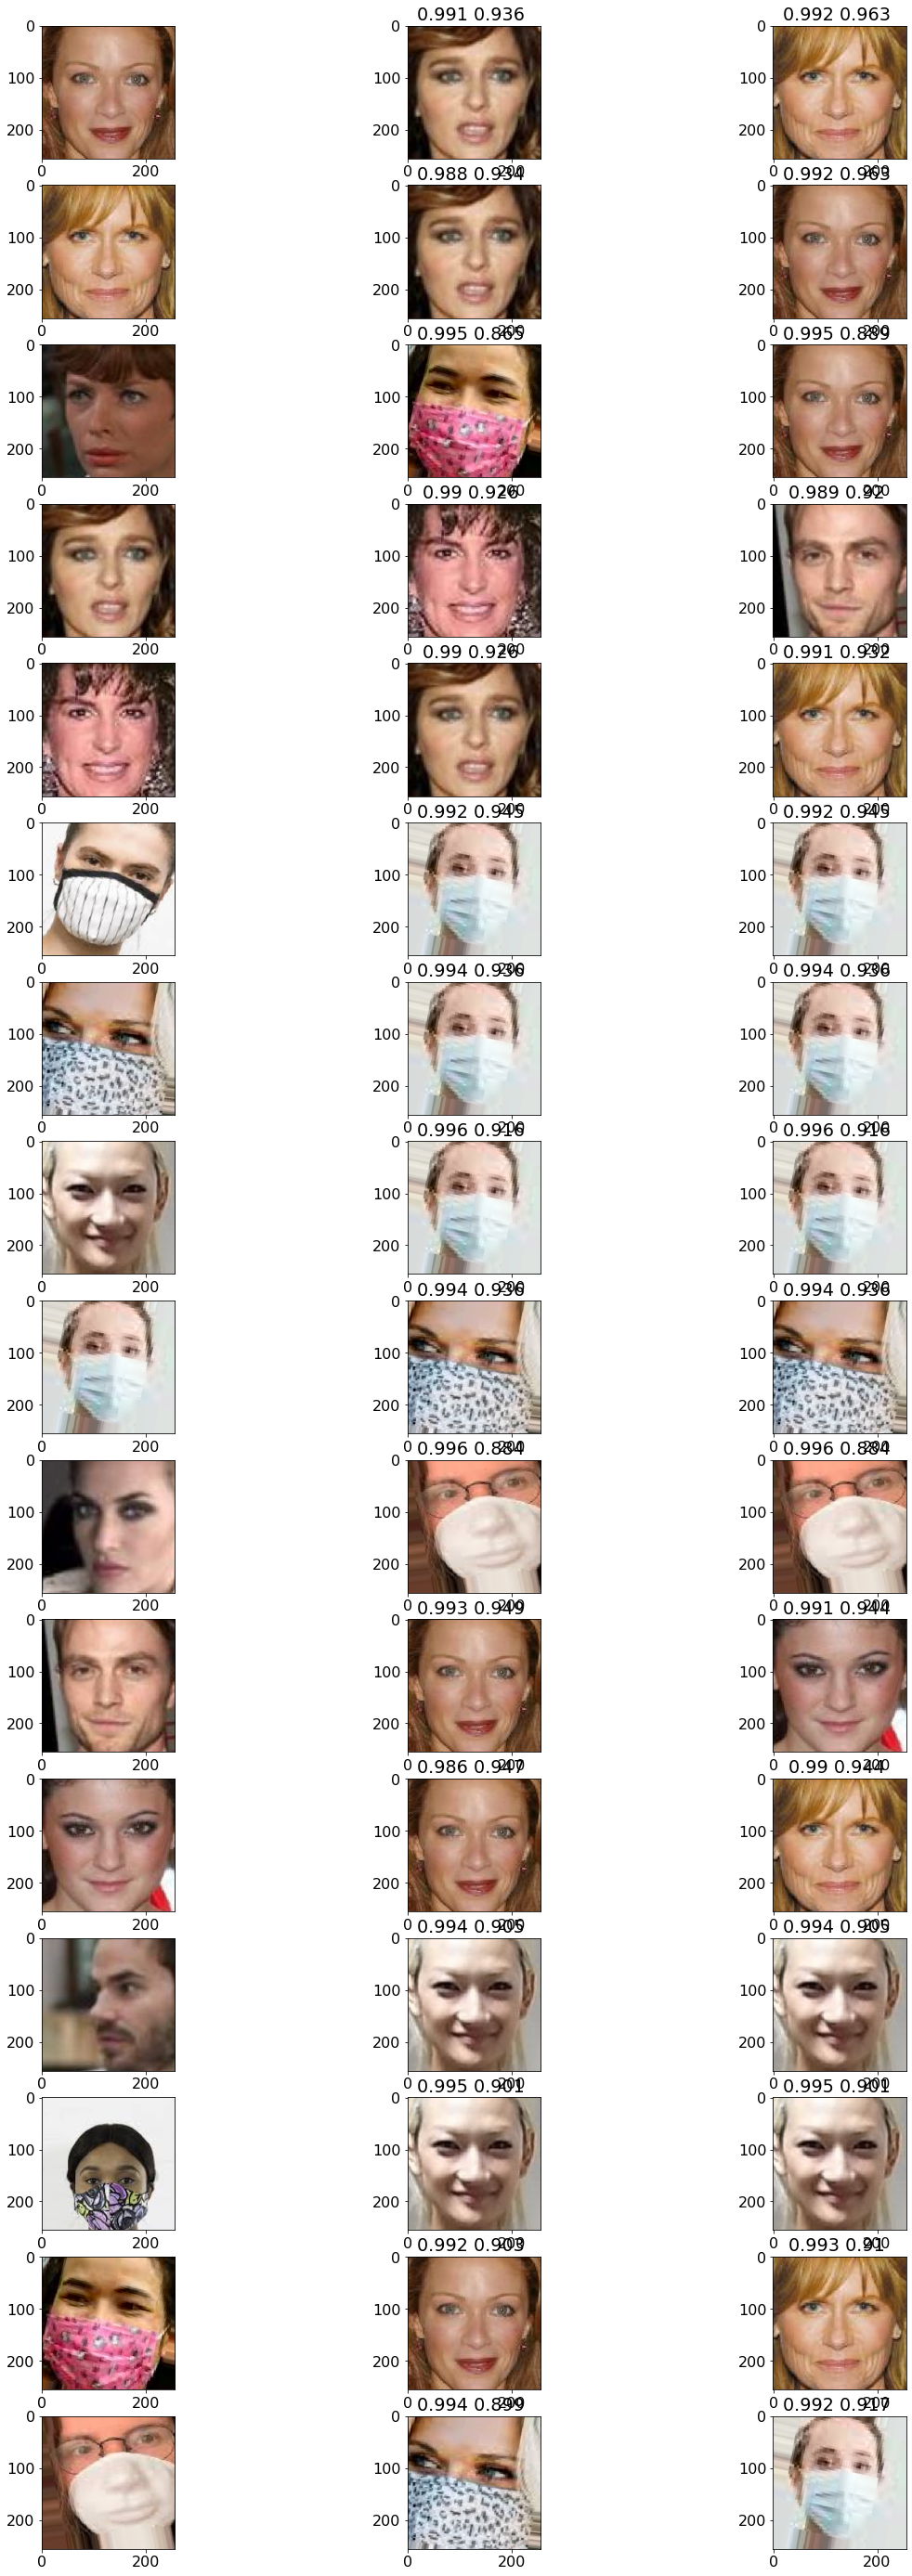

In [747]:
plot_hashed(X_test,argmins_X_test_encoded_non_denoise_distances,argmins_X_test_encoded_distances)